In [16]:
import pandas as pd
import os
import matplotlib.pyplot as plt

variablesKey = 'Validators'
variablesSplit = 'l2_relative_error_'
validatorsRename = {'validator':'Validator'}
variablesID = 'validator'
#TODO get subfolders automatically
subfolders = ['Uniform_500','SPADE_500','MIS_500','Uniform_4000']

# run aggregates with these subfoldetrs
#folder = 'C:/Users/jacec/Documents/Test_Runs/'
folder = 'C:/Users/John Anticev/Documents/SCHOOL/aggregator_runs/'
folder = 'C:/Users/jacec/OneDrive - stevens.edu/4_DATA/Aggregator_Runs/'
#aggregates = [folder+f+'/aggregates/' for f in os.listdir(folder) if os.path.isdir(folder+f)][0:1]
aggregates = [folder+f+'/aggregates/' for f in ['ldc'] if os.path.isdir(folder+f)]
#all results will be in /aggregates, separated by tags from subfolders
#find all validation files separated by subfolder
files = []
#for i in aggregates:
#    csvs_by_testcase = [[i + g for g in os.listdir(i) if (g.endswith('.csv')) and (variablesKey in g) and (f in g)] for f in subfolders]
#    files = files+[i for i in csvs_by_testcase if i]
files = [[i+g for g in os.listdir(i) if g.endswith('.csv') and (variablesKey in g)] for i in aggregates]
#files = [[aggregates + g for g in os.listdir(aggregates) if ('.csv' in g) and (f in g)] for f in subfolders] 
#list of lists of the files for each individual aggregation
#Go through sub-list, load into dataframes with descriptive columns
#Find unique variables, create sub-frames with them in a format for plotting



In [17]:
files

[['C:/Users/jacec/OneDrive - stevens.edu/4_DATA/Aggregator_Runs/ldc/aggregates/Validatorsvalidatorl2_relative_error_nu-Baseline_4M-ldc.csv',
  'C:/Users/jacec/OneDrive - stevens.edu/4_DATA/Aggregator_Runs/ldc/aggregates/Validatorsvalidatorl2_relative_error_nu-Baseline_500K-ldc.csv',
  'C:/Users/jacec/OneDrive - stevens.edu/4_DATA/Aggregator_Runs/ldc/aggregates/Validatorsvalidatorl2_relative_error_nu-MIS_500-ldc.csv',
  'C:/Users/jacec/OneDrive - stevens.edu/4_DATA/Aggregator_Runs/ldc/aggregates/Validatorsvalidatorl2_relative_error_nu-Modulus_IS_500K-ldc.csv',
  'C:/Users/jacec/OneDrive - stevens.edu/4_DATA/Aggregator_Runs/ldc/aggregates/Validatorsvalidatorl2_relative_error_nu-SGM_500K-ldc.csv',
  'C:/Users/jacec/OneDrive - stevens.edu/4_DATA/Aggregator_Runs/ldc/aggregates/Validatorsvalidatorl2_relative_error_nu-SPADE_500-ldc.csv',
  'C:/Users/jacec/OneDrive - stevens.edu/4_DATA/Aggregator_Runs/ldc/aggregates/Validatorsvalidatorl2_relative_error_nu-Uniform_4000-ldc.csv',
  'C:/Users/jac

In [18]:
#each aggregate becomes one dataframe
#extract common variable names (validator, validator_n, uvpvnu)
#load into df with descriptive columns, uses 'subfolder' name, validator name, variable name
dataframes = []
agNames = []
for aggregation in files:
    dfs = []
    agName = aggregation[0].split('/aggregates/')[0].split('/')[-1]
    for testName in subfolders:
        subtests = [csv for csv in aggregation if testName in csv]
        if not subtests:
            continue
        print(subtests)
        for k,i in enumerate(subtests):
            validatorName = i.split(variablesKey)[1].split(variablesSplit)[0]
            vv = i.split(variablesSplit)[1].split('-'+testName)[0]
            variableName = f'{testName}_{validatorsRename[validatorName]}_{vv}_'
            print(variableName)
            #df = pd.read_csv(i, index_col = 0, delimiter=';')
            df = pd.read_csv(i, delimiter=';')
            oldcols = df.keys()
            print(oldcols)
            #mapping = {i:variableName+i for i in oldcols[0:-1]}
            mapping = {'Unnamed: 0':variableName+'step'}
            if k == 0:
                mapping.update({'wall_time':testName+'_wall_time'})
            mapping.update({i:variableName+i for i in oldcols[1:-1]})
            print(mapping)
            df.rename(columns=mapping, inplace=True)
            newcols = df.keys()
            print(newcols)
            if k > 0:
                df.drop(columns='wall_time')
            dfs.append(df)
    df = pd.concat(dfs, axis=1)
    df = df.loc[:,~df.columns.duplicated()].copy() #drop duplicates based on column name alone
    #append to dataframes list
    dataframes.append(df)
    agNames.append(agName)

['C:/Users/jacec/OneDrive - stevens.edu/4_DATA/Aggregator_Runs/ldc/aggregates/Validatorsvalidatorl2_relative_error_nu-Uniform_500-ldc.csv', 'C:/Users/jacec/OneDrive - stevens.edu/4_DATA/Aggregator_Runs/ldc/aggregates/Validatorsvalidatorl2_relative_error_u-Uniform_500-ldc.csv', 'C:/Users/jacec/OneDrive - stevens.edu/4_DATA/Aggregator_Runs/ldc/aggregates/Validatorsvalidatorl2_relative_error_v-Uniform_500-ldc.csv']
Uniform_500_Validator_nu_
Index(['Unnamed: 0', 'mean', 'amin', 'amax', 'median', 'std', 'var',
       'wall_time'],
      dtype='object')
{'Unnamed: 0': 'Uniform_500_Validator_nu_step', 'wall_time': 'Uniform_500_wall_time', 'mean': 'Uniform_500_Validator_nu_mean', 'amin': 'Uniform_500_Validator_nu_amin', 'amax': 'Uniform_500_Validator_nu_amax', 'median': 'Uniform_500_Validator_nu_median', 'std': 'Uniform_500_Validator_nu_std', 'var': 'Uniform_500_Validator_nu_var'}
Index(['Uniform_500_Validator_nu_step', 'Uniform_500_Validator_nu_mean',
       'Uniform_500_Validator_nu_amin', '

In [19]:
dataframes[0]


,Uniform_500_Validator_nu_step,Uniform_500_Validator_nu_mean,Uniform_500_Validator_nu_amin,Uniform_500_Validator_nu_amax,Uniform_500_Validator_nu_median,Uniform_500_Validator_nu_std,Uniform_500_Validator_nu_var,Uniform_500_wall_time,Uniform_500_Validator_u_step,Uniform_500_Validator_u_mean,...,Uniform_4000_Validator_u_median,Uniform_4000_Validator_u_std,Uniform_4000_Validator_u_var,Uniform_4000_Validator_v_step,Uniform_4000_Validator_v_mean,Uniform_4000_Validator_v_amin,Uniform_4000_Validator_v_amax,Uniform_4000_Validator_v_median,Uniform_4000_Validator_v_std,Uniform_4000_Validator_v_var
0,16000,1.254211,1.254211,1.254211,1.254211,0.0,0.0,1.686358e+09,16000,0.604409,...,0.600004,0.002754,7.585221e-06,16000,0.847834,0.837847,0.852828,0.852828,0.007062,4.987521e-05
1,70000,1.131567,1.131567,1.131567,1.131567,0.0,0.0,1.686359e+09,70000,0.593512,...,0.488526,0.000758,5.749642e-07,70000,0.656025,0.652703,0.657686,0.657686,0.002349,5.518388e-06
2,154000,1.115846,1.115846,1.115846,1.115846,0.0,0.0,1.686361e+09,154000,0.593664,...,0.364053,0.091155,8.309274e-03,154000,0.571993,0.475264,0.765450,0.475264,0.136795,1.871293e-02
3,160000,1.114677,1.114677,1.114677,1.114677,0.0,0.0,1.686361e+09,160000,0.592931,...,0.362719,0.055793,3.112817e-03,160000,0.531404,0.479258,0.635696,0.479258,0.073745,5.438385e-03
4,287000,0.935159,0.935159,0.935159,0.935159,0.0,0.0,1.686365e+09,287000,0.448405,...,0.176974,0.006293,3.960683e-05,287000,0.224978,0.210293,0.232321,0.232321,0.010384,1.078296e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2418000,0.218009,0.218009,0.218009,0.218009,0.0,0.0,1.686419e+09,2418000,0.088147,...,0.051840,0.000421,1.768298e-07,2418000,0.063450,0.063165,0.064020,0.063165,0.000403,1.624580e-07
96,2428000,0.217923,0.217923,0.217923,0.217923,0.0,0.0,1.686419e+09,2428000,0.088216,...,0.051779,0.000447,2.000452e-07,2428000,0.063486,0.063186,0.064085,0.063186,0.000424,1.796040e-07
97,2439000,0.217856,0.217856,0.217856,0.217856,0.0,0.0,1.686419e+09,2439000,0.088257,...,0.051823,0.000456,2.080296e-07,2439000,0.063506,0.063151,0.064214,0.063151,0.000501,2.510921e-07
98,2445000,0.217631,0.217631,0.217631,0.217631,0.0,0.0,1.686420e+09,2445000,0.087945,...,0.051926,0.000449,2.013023e-07,2445000,0.063464,0.063167,0.064057,0.063167,0.000420,1.762263e-07


[[('Uniform_500_Validator_nu_step', 'Uniform_500_Validator_nu_mean'), ('SPADE_500_Validator_nu_step', 'SPADE_500_Validator_nu_mean'), ('MIS_500_Validator_nu_step', 'MIS_500_Validator_nu_mean'), ('Uniform_4000_Validator_nu_step', 'Uniform_4000_Validator_nu_mean')]]
[('Uniform_500_Validator_nu_step', 'Uniform_500_Validator_nu_mean'), ('SPADE_500_Validator_nu_step', 'SPADE_500_Validator_nu_mean'), ('MIS_500_Validator_nu_step', 'MIS_500_Validator_nu_mean'), ('Uniform_4000_Validator_nu_step', 'Uniform_4000_Validator_nu_mean')]
[[('Uniform_500_Validator_nu_step', 'Uniform_500_wall_time', 'Uniform_500_Validator_nu_mean'), ('SPADE_500_Validator_nu_step', 'SPADE_500_wall_time', 'SPADE_500_Validator_nu_mean'), ('MIS_500_Validator_nu_step', 'MIS_500_wall_time', 'MIS_500_Validator_nu_mean'), ('Uniform_4000_Validator_nu_step', 'Uniform_4000_wall_time', 'Uniform_4000_Validator_nu_mean')]]
('Uniform_500_Validator_nu_step', 'Uniform_500_wall_time', 'Uniform_500_Validator_nu_mean')
## min
0.21728716790

C:\Users\jacec\AppData\Local\Temp\ipykernel_13076\1963212529.py:76: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tm.append(rawdat.min()[2])
C:\Users\jacec\AppData\Local\Temp\ipykernel_13076\1963212529.py:77: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(rawdat.min()[2])
C:\Users\jacec\AppData\Local\Temp\ipykernel_13076\1963212529.py:79: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tm.append(rawdat.idxmin()[2])
C:\Users\jacec

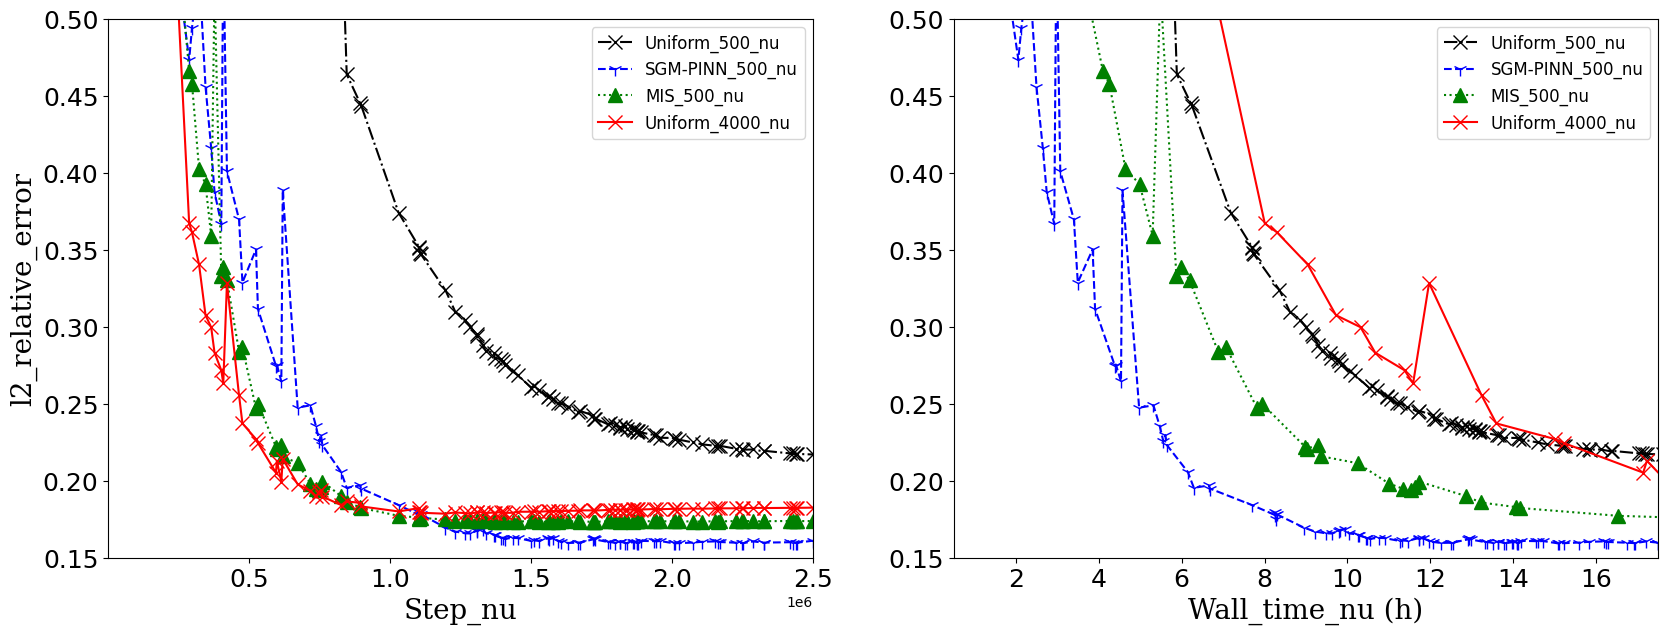

In [23]:
plotVar = 'nu'
#plot step series p
plotVars_p_allValidators = [[(f'{i}_{j}_{plotVar}_step',f'{i}_{j}_{plotVar}_mean') for i in subfolders] for j in validatorsRename.values()]
print(plotVars_p_allValidators)
stepFilter = dataframes[0][f'{subfolders[0]}_Validator_nu_step'] >= 150000
def set_cycler(ax):
    ax.set_prop_cycle(plt.cycler('color', ['r', 'b', 'g', 'c'])+
                      plt.cycler('linestyle', ['-','--',':','-.'])+
                      plt.cycler('marker', ['.','*','^','x']))
    
def set_cycler(ax):
    ax.set_prop_cycle(plt.cycler('color', ['c', 'b', 'g', 'r'])+
                      plt.cycler('linestyle', ['-','--',':','-.'])+
                      plt.cycler('marker', ['x','1','^','x']))
    
def set_cycler(ax):
    ax.set_prop_cycle(plt.cycler('color', ['k', 'b', 'g', 'r'])+
                      plt.cycler('linestyle', ['-.','--',':','-'])+
                      plt.cycler('marker', ['x','1','^','x']))
    
font2 = {'family':'serif','color':'black','size':20}
manualLegend = ['Uniform_500_nu','SGM-PINN_500_nu','MIS_500_nu','Uniform_4000_nu']

for i in range(len(dataframes)):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (20,7))
    #fig.suptitle(f'P step series for {agNames[i]}')
    plt.rc('legend', fontsize = 12)
    axes[0].set_ylabel('l2_relative_error', fontdict=font2)
    for k,j in enumerate(plotVars_p_allValidators):
        set_cycler(axes[k])
        print(j)
        axes[k].ticklabel_format(axis='x', style='sci',scilimits=(0,0))
        axes[k].tick_params(axis='both', labelsize=18)
        #print(f'{[(l,dataframes[i][j][l][99]) for l in dataframes[i][j]]}')
        for l in j:
            #print(l)
            rawdat = dataframes[i][list(l)]
            #print(rawdat)
            rawdat.plot(x=l[0],y=l[1],ax=axes[k],markersize=10)
        #dataframes[i][j][stepFilter].plot(x=j[0],ax=axes[k], markersize=10)
        axes[k].set_ylim((.15,.5))
        axes[k].set_xlim((.5,2.5e6))
        axes[k].set_xlabel('Step_'+str(l[0].split('_')[-2]), fontdict=font2)
        axes[k].legend(manualLegend)
    plotVars_p_allValidators = [[(f'{i}_wall_time',f'{i}_{j}_{plotVar}_mean') for i in subfolders] for j in validatorsRename.values()]
    for kk,j in enumerate(plotVars_p_allValidators):
        k = kk+1
        set_cycler(axes[k])
        axes[k].set_ylim((.15,.5))
        axes[k].set_xlim((.5,17.5))
        for l in j:
            rawdat = dataframes[i][list(l)]
            rawdat.loc[:,l[0]] = (rawdat.loc[:,l[0]] - rawdat.loc[0,l[0]])/60/60
            rawdat[rawdat[l[0]] >= .7].plot(x=l[0],y=l[1],ax=axes[k],markersize=10)
            axes[k].set_xlabel(f'Wall_time_{plotVar} (h)', fontdict=font2)
            axes[k].ticklabel_format(axis='x', style='plain',scilimits=(0,0)) #whats the code for numeric? 
            #axes[k].ticklabel_format(axis='x', style='sci',scilimits=(0,0)) is for sci, but not for numeric
            #axes[k].ticklabel_format(axis='x', style='plain',scilimits=(0,0)) 
            axes[k].tick_params(axis='both', labelsize=18)
            #print(l)
            time = [(q) for q in dataframes[i][l[0]]]
            #print(f'{(time[-1]-time[1])/60/60}')
        axes[k].legend(manualLegend)

plotVars_p_allValidators = [[(f'{i}_{j}_{plotVar}_step',f'{i}_wall_time',f'{i}_{j}_{plotVar}_mean') for i in subfolders] for j in validatorsRename.values()]
print(plotVars_p_allValidators)
for i in range(len(dataframes)):
    for k,j in enumerate(plotVars_p_allValidators):
        minimums = []
        for l in j:
            print(l)
            tm = []
            rawdat = dataframes[i][list(l)]
            rawdat.loc[:,l[1]] = (rawdat.loc[:,l[1]] - rawdat.loc[0,l[1]])/60/60
            print('## min')
            tm.append(rawdat.min()[2])
            print(rawdat.min()[2])
            print('--idxmin')
            tm.append(rawdat.idxmin()[2])
            print(rawdat.idxmin()[2])
            print('-- loc')
            tm.append(rawdat.loc[rawdat.idxmin()[2],l[1]])
            print(rawdat.loc[rawdat.idxmin()[2],l[1]])
            minimums.append(tm)
        print(minimums)

[[('Uniform_500_Validator_u_step', 'Uniform_500_Validator_u_mean'), ('SPADE_500_Validator_u_step', 'SPADE_500_Validator_u_mean'), ('MIS_500_Validator_u_step', 'MIS_500_Validator_u_mean'), ('Uniform_4000_Validator_u_step', 'Uniform_4000_Validator_u_mean')]]
[[('Uniform_500_Validator_u_step', 'Uniform_500_wall_time', 'Uniform_500_Validator_u_mean'), ('SPADE_500_Validator_u_step', 'SPADE_500_wall_time', 'SPADE_500_Validator_u_mean'), ('MIS_500_Validator_u_step', 'MIS_500_wall_time', 'MIS_500_Validator_u_mean'), ('Uniform_4000_Validator_u_step', 'Uniform_4000_wall_time', 'Uniform_4000_Validator_u_mean')]]
('Uniform_500_Validator_u_step', 'Uniform_500_wall_time', 'Uniform_500_Validator_u_mean')
## min
0.0879449769854545
--idxmin
98
-- loc
17.217366598910754
('SPADE_500_Validator_u_step', 'SPADE_500_wall_time', 'SPADE_500_Validator_u_mean')
## min
0.0412139346202214
--idxmin
90
-- loc
16.914500046041276
('MIS_500_Validator_u_step', 'MIS_500_wall_time', 'MIS_500_Validator_u_mean')
## min
0.04

C:\Users\jacec\AppData\Local\Temp\ipykernel_13076\3823723627.py:72: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tm.append(rawdat.min()[2])
C:\Users\jacec\AppData\Local\Temp\ipykernel_13076\3823723627.py:73: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(rawdat.min()[2])
C:\Users\jacec\AppData\Local\Temp\ipykernel_13076\3823723627.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tm.append(rawdat.idxmin()[2])
C:\Users\jacec

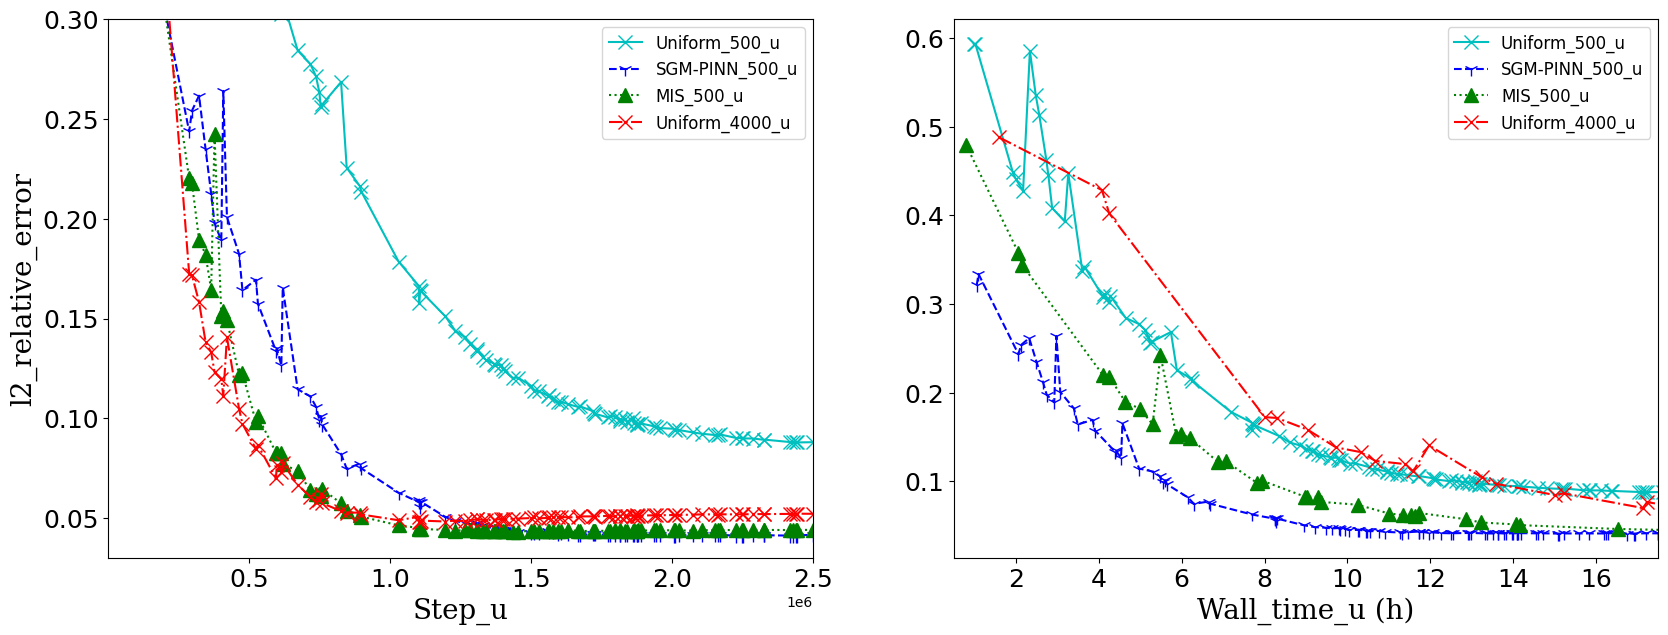

In [21]:
plotVar = 'u'
#plot step series p
plotVars_p_allValidators = [[(f'{i}_{j}_{plotVar}_step',f'{i}_{j}_{plotVar}_mean') for i in subfolders] for j in validatorsRename.values()]
print(plotVars_p_allValidators)
stepFilter = dataframes[0][f'{subfolders[0]}_Validator_nu_step'] >= 150000
def set_cycler(ax):
    ax.set_prop_cycle(plt.cycler('color', ['r', 'b', 'g', 'c'])+
                      plt.cycler('linestyle', ['-','--',':','-.'])+
                      plt.cycler('marker', ['.','*','^','x']))
    
def set_cycler(ax):
    ax.set_prop_cycle(plt.cycler('color', ['c', 'b', 'g', 'r'])+
                      plt.cycler('linestyle', ['-','--',':','-.'])+
                      plt.cycler('marker', ['x','1','^','x']))
    
font2 = {'family':'serif','color':'black','size':20}
manualLegend = ['Uniform_500_u','SGM-PINN_500_u','MIS_500_u','Uniform_4000_u']

for i in range(len(dataframes)):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (20,7))
    #fig.suptitle(f'P step series for {agNames[i]}')
    plt.rc('legend', fontsize = 12)
    axes[0].set_ylabel('l2_relative_error', fontdict=font2)
    for k,j in enumerate(plotVars_p_allValidators):
        set_cycler(axes[k])
        #print(j)
        axes[k].ticklabel_format(axis='x', style='sci',scilimits=(0,0))
        axes[k].tick_params(axis='both', labelsize=18)
        #print(f'{[(l,dataframes[i][j][l][99]) for l in dataframes[i][j]]}')
        for l in j:
            #print(l)
            rawdat = dataframes[i][list(l)]
            #print(rawdat)
            rawdat.plot(x=l[0],y=l[1],ax=axes[k],markersize=10)
        #dataframes[i][j][stepFilter].plot(x=j[0],ax=axes[k], markersize=10)
        axes[k].set_ylim((.03,.3))
        axes[k].set_xlim((.5,2.5e6))
        #axes[k].set_xlabel(l[0].split('_')[0]+str(l[0].split('_')[-3:-1]), fontdict=font2)
        axes[k].set_xlabel('Step_'+str(l[0].split('_')[-2]), fontdict=font2)
        axes[k].legend(manualLegend)
    plotVars_p_allValidators = [[(f'{i}_wall_time',f'{i}_{j}_{plotVar}_mean') for i in subfolders] for j in validatorsRename.values()]
    for kk,j in enumerate(plotVars_p_allValidators):
        k = kk+1
        set_cycler(axes[k])
        #axes[k].set_ylim((.15,.5))
        axes[k].set_xlim((.5,17.5))
        for l in j:
            rawdat = dataframes[i][list(l)]
            rawdat.loc[:,l[0]] = (rawdat.loc[:,l[0]] - rawdat.loc[0,l[0]])/60/60
            rawdat[rawdat[l[0]] >= .7].plot(x=l[0],y=l[1],ax=axes[k],markersize=10)
            axes[k].set_xlabel(f'Wall_time_{plotVar} (h)', fontdict=font2)
            axes[k].ticklabel_format(axis='x', style='plain',scilimits=(0,0)) #whats the code for numeric? 
            #axes[k].ticklabel_format(axis='x', style='sci',scilimits=(0,0)) is for sci, but not for numeric
            #axes[k].ticklabel_format(axis='x', style='plain',scilimits=(0,0)) 
            axes[k].tick_params(axis='both', labelsize=18)
            #print(l)
            time = [(q) for q in dataframes[i][l[0]]]
            #print(f'{(time[-1]-time[1])/60/60}')
        axes[k].legend(manualLegend)

plotVars_p_allValidators = [[(f'{i}_{j}_{plotVar}_step',f'{i}_wall_time',f'{i}_{j}_{plotVar}_mean') for i in subfolders] for j in validatorsRename.values()]
print(plotVars_p_allValidators)
for i in range(len(dataframes)):
    for k,j in enumerate(plotVars_p_allValidators):
        minimums = []
        for l in j:
            print(l)
            tm = []
            rawdat = dataframes[i][list(l)]
            rawdat.loc[:,l[1]] = (rawdat.loc[:,l[1]] - rawdat.loc[0,l[1]])/60/60
            print('## min')
            tm.append(rawdat.min()[2])
            print(rawdat.min()[2])
            print('--idxmin')
            tm.append(rawdat.idxmin()[2])
            print(rawdat.idxmin()[2])
            print('-- loc')
            tm.append(rawdat.loc[rawdat.idxmin()[2],l[1]])
            print(rawdat.loc[rawdat.idxmin()[2],l[1]])
            minimums.append(tm)
        print(minimums)
        
meanFilter = dataframes[0][f'SPADE_500_Validator_u_mean'] <= minimums[-1][0]
rawdat = dataframes[0][['SPADE_500_wall_time',f'SPADE_500_Validator_u_mean']]
rawdat.loc[:,'SPADE_500_wall_time'] = (rawdat.loc[:,'SPADE_500_wall_time'] - rawdat.loc[0,'SPADE_500_wall_time'])/60/60
rawdat = rawdat[meanFilter]
print(rawdat)

meanFilter = dataframes[0][f'SPADE_500_Validator_u_mean'] <= minimums[-2][0]
rawdat = dataframes[0][['SPADE_500_wall_time',f'SPADE_500_Validator_u_mean']]
rawdat.loc[:,'SPADE_500_wall_time'] = (rawdat.loc[:,'SPADE_500_wall_time'] - rawdat.loc[0,'SPADE_500_wall_time'])/60/60
rawdat = rawdat[meanFilter]
print(rawdat)

meanFilter = dataframes[0][f'MIS_500_Validator_u_mean'] <= minimums[-1][0]
rawdat = dataframes[0][['MIS_500_wall_time',f'MIS_500_Validator_u_mean']]
rawdat.loc[:,'MIS_500_wall_time'] = (rawdat.loc[:,'MIS_500_wall_time'] - rawdat.loc[0,'MIS_500_wall_time'])/60/60
rawdat = rawdat[meanFilter]
print(rawdat)

[[('Uniform_500_Validator_v_step', 'Uniform_500_Validator_v_mean'), ('SPADE_500_Validator_v_step', 'SPADE_500_Validator_v_mean'), ('MIS_500_Validator_v_step', 'MIS_500_Validator_v_mean'), ('Uniform_4000_Validator_v_step', 'Uniform_4000_Validator_v_mean')]]
[('Uniform_500_Validator_v_step', 'Uniform_500_Validator_v_mean'), ('SPADE_500_Validator_v_step', 'SPADE_500_Validator_v_mean'), ('MIS_500_Validator_v_step', 'MIS_500_Validator_v_mean'), ('Uniform_4000_Validator_v_step', 'Uniform_4000_Validator_v_mean')]
('Uniform_500_Validator_v_step', 'Uniform_500_Validator_v_mean')
    Uniform_500_Validator_v_step  Uniform_500_Validator_v_mean
0                          16000                      0.915716
1                          70000                      0.819342
2                         154000                      0.802758
3                         160000                      0.803090
4                         287000                      0.593143
..                           ...             

C:\Users\jacec\AppData\Local\Temp\ipykernel_13076\4280559127.py:72: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tm.append(rawdat.min()[2])
C:\Users\jacec\AppData\Local\Temp\ipykernel_13076\4280559127.py:73: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(rawdat.min()[2])
C:\Users\jacec\AppData\Local\Temp\ipykernel_13076\4280559127.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tm.append(rawdat.idxmin()[2])
C:\Users\jacec

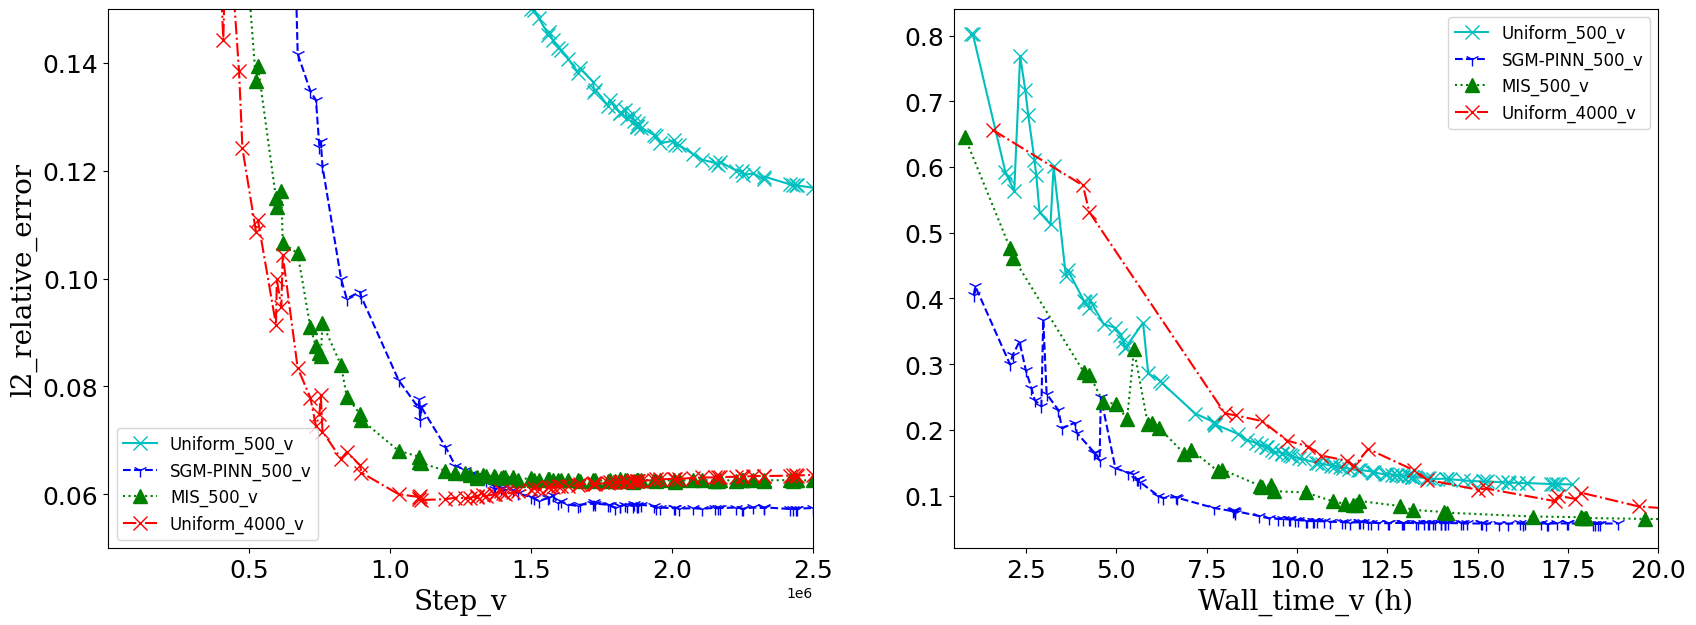

In [26]:
plotVar = 'v'
#plot step series p
plotVars_p_allValidators = [[(f'{i}_{j}_{plotVar}_step',f'{i}_{j}_{plotVar}_mean') for i in subfolders] for j in validatorsRename.values()]
print(plotVars_p_allValidators)
stepFilter = dataframes[0][f'{subfolders[0]}_Validator_nu_step'] >= 150000
def set_cycler(ax):
    ax.set_prop_cycle(plt.cycler('color', ['r', 'b', 'g', 'c'])+
                      plt.cycler('linestyle', ['-','--',':','-.'])+
                      plt.cycler('marker', ['.','*','^','x']))
    
def set_cycler(ax):
    ax.set_prop_cycle(plt.cycler('color', ['c', 'b', 'g', 'r'])+
                      plt.cycler('linestyle', ['-','--',':','-.'])+
                      plt.cycler('marker', ['x','1','^','x']))
    
font2 = {'family':'serif','color':'black','size':20}
manualLegend = ['Uniform_500_v','SGM-PINN_500_v','MIS_500_v','Uniform_4000_v']

for i in range(len(dataframes)):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (20,7))
    #fig.suptitle(f'P step series for {agNames[i]}')
    plt.rc('legend', fontsize = 12)
    axes[0].set_ylabel('l2_relative_error', fontdict=font2)
    for k,j in enumerate(plotVars_p_allValidators):
        set_cycler(axes[k])
        print(j)
        axes[k].ticklabel_format(axis='x', style='sci',scilimits=(0,0))
        axes[k].tick_params(axis='both', labelsize=18)
        #print(f'{[(l,dataframes[i][j][l][99]) for l in dataframes[i][j]]}')
        for l in j:
            print(l)
            rawdat = dataframes[i][list(l)]
            print(rawdat)
            rawdat.plot(x=l[0],y=l[1],ax=axes[k],markersize=10)
        #dataframes[i][j][stepFilter].plot(x=j[0],ax=axes[k], markersize=10)
        axes[k].set_ylim((.05,.15))
        axes[k].set_xlim((.5,2.5e6))
        #axes[k].set_xlabel(l[0].split('_')[0]+str(l[0].split('_')[-3:-1]), fontdict=font2)
        axes[k].set_xlabel('Step_'+str(l[0].split('_')[-2]), fontdict=font2)
        axes[k].legend(manualLegend)
    plotVars_p_allValidators = [[(f'{i}_wall_time',f'{i}_{j}_{plotVar}_mean') for i in subfolders] for j in validatorsRename.values()]
    for kk,j in enumerate(plotVars_p_allValidators):
        k = kk+1
        set_cycler(axes[k])
        #axes[k].set_ylim((.15,.5))
        axes[k].set_xlim((.5,20))
        for l in j:
            rawdat = dataframes[i][list(l)]
            rawdat.loc[:,l[0]] = (rawdat.loc[:,l[0]] - rawdat.loc[0,l[0]])/60/60
            rawdat[rawdat[l[0]] >= .7].plot(x=l[0],y=l[1],ax=axes[k],markersize=10)
            axes[k].set_xlabel(f'Wall_time_{plotVar} (h)', fontdict=font2)
            axes[k].ticklabel_format(axis='x', style='plain',scilimits=(0,0)) #whats the code for numeric? 
            #axes[k].ticklabel_format(axis='x', style='sci',scilimits=(0,0)) is for sci, but not for numeric
            #axes[k].ticklabel_format(axis='x', style='plain',scilimits=(0,0)) 
            axes[k].tick_params(axis='both', labelsize=18)
            print(l)
            time = [(q) for q in dataframes[i][l[0]]]
            print(f'{(time[-1]-time[1])/60/60}')
        axes[k].legend(manualLegend)

plotVars_p_allValidators = [[(f'{i}_{j}_{plotVar}_step',f'{i}_wall_time',f'{i}_{j}_{plotVar}_mean') for i in subfolders] for j in validatorsRename.values()]
print(plotVars_p_allValidators)
for i in range(len(dataframes)):
    for k,j in enumerate(plotVars_p_allValidators):
        minimums = []
        for l in j:
            print(l)
            tm = []
            rawdat = dataframes[i][list(l)]
            rawdat.loc[:,l[1]] = (rawdat.loc[:,l[1]] - rawdat.loc[0,l[1]])/60/60
            print('## min')
            tm.append(rawdat.min()[2])
            print(rawdat.min()[2])
            print('--idxmin')
            tm.append(rawdat.idxmin()[2])
            print(rawdat.idxmin()[2])
            print('-- loc')
            tm.append(rawdat.loc[rawdat.idxmin()[2],l[1]])
            print(rawdat.loc[rawdat.idxmin()[2],l[1]])
            minimums.append(tm)
        print(minimums)


meanFilter = dataframes[0][f'SPADE_500_Validator_{plotVar}_mean'] <= minimums[-1][0]
rawdat = dataframes[0][['SPADE_500_wall_time',f'SPADE_500_Validator_{plotVar}_mean']]
rawdat.loc[:,'SPADE_500_wall_time'] = (rawdat.loc[:,'SPADE_500_wall_time'] - rawdat.loc[0,'SPADE_500_wall_time'])/60/60
rawdat = rawdat[meanFilter]
print(rawdat)

meanFilter = dataframes[0][f'SPADE_500_Validator_{plotVar}_mean'] <= minimums[-2][0]
rawdat = dataframes[0][['SPADE_500_wall_time',f'SPADE_500_Validator_{plotVar}_mean']]
rawdat.loc[:,'SPADE_500_wall_time'] = (rawdat.loc[:,'SPADE_500_wall_time'] - rawdat.loc[0,'SPADE_500_wall_time'])/60/60
rawdat = rawdat[meanFilter]
print(rawdat)

meanFilter = dataframes[0][f'MIS_500_Validator_{plotVar}_mean'] <= minimums[-1][0]
rawdat = dataframes[0][['MIS_500_wall_time',f'MIS_500_Validator_{plotVar}_mean']]
rawdat.loc[:,'MIS_500_wall_time'] = (rawdat.loc[:,'MIS_500_wall_time'] - rawdat.loc[0,'MIS_500_wall_time'])/60/60
rawdat = rawdat[meanFilter]
print(rawdat)

meanFilter = dataframes[0][f'Uniform_4000_Validator_{plotVar}_mean'] <= minimums[-2][0]
rawdat = dataframes[0][['Uniform_4000_wall_time',f'Uniform_4000_Validator_{plotVar}_mean']]
rawdat.loc[:,'Uniform_4000_wall_time'] = (rawdat.loc[:,'Uniform_4000_wall_time'] - rawdat.loc[0,'Uniform_4000_wall_time'])/60/60
rawdat = rawdat[meanFilter]
print(rawdat)